Read two documents and integrate data using 'parent_asin'. Select 11 variables and filter for the "Appliances" category from all classes. Additionally, select only reviews with verified payments to avoid fake reviews.

In [ ]:
# Import necessary libraries
!pip install transformers
!pip install datasets


from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023",'raw_review_Appliances')

print(dataset)

# Convert the 'full' dataset to a pandas DataFrame
review_df = dataset['full'].to_pandas()


"""# Save the DataFrame to a CSV file
review_df.to_csv('/Users/apple/Desktop/Business Project/review.csv', index=False)"""

from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023",'raw_meta_Appliances')

print(dataset)

# Convert the 'full' dataset to a pandas DataFrame
product_df = dataset['full'].to_pandas()

"""# Save the DataFrame to a CSV file
product_df.to_csv('/Users/apple/Desktop/Business Project/dataset.csv', index=False)"""



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 req

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for McAuley-Lab/Amazon-Reviews-2023 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/McAuley-Lab/Amazon-Reviews-2023.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating full split: 0 examples [00:00, ? examples/s]

DatasetDict({
    full: Dataset({
        features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
        num_rows: 2128605
    })
})


Generating full split: 0 examples [00:00, ? examples/s]

DatasetDict({
    full: Dataset({
        features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
        num_rows: 94327
    })
})


"# Save the DataFrame to a CSV file\nproduct_df.to_csv('/Users/apple/Desktop/Business Project/dataset.csv', index=False)"

In [ ]:
# Filter DataFrame for 'Appliances' in 'main_category'
import pandas as pd
filtered_df = product_df[product_df['main_category'] == 'Appliances']
selected_product_columns = ['main_category', 'title', 'average_rating', 'rating_number', 'store', 'parent_asin']
filtered_product_df = filtered_df[selected_product_columns]

selected_review_columns = ['rating', 'title', 'text', 'parent_asin', 'timestamp', 'verified_purchase']
filtered_review_df = review_df[selected_review_columns]

print("Shape before filtering:", filtered_product_df.shape)
print("Shape before filtering:", filtered_review_df.shape)


# Merge the DataFrames on 'parent_asin'
merged_df = filtered_review_df.merge(filtered_product_df, on='parent_asin', how='inner')


# Select 2013-2023 range
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='ms')
start_date = '2013-01-01'
end_date = '2023-12-31'
filtered_df = merged_df[(merged_df['timestamp'] >= start_date) & (merged_df['timestamp'] <= end_date)]

verified_review = filtered_df[filtered_df['verified_purchase'] == True]
# Output the shape of the DataFrame after filtering
print("Shape after filtering:", verified_review.shape)

print(verified_review)

Shape before filtering: (25572, 6)
Shape before filtering: (2128605, 6)
Shape after filtering: (548426, 11)
        rating                                            title_x  \
0          5.0                                         Five Stars   
1          5.0  My old door hinge broke. This worked perfectly...   
2          5.0       Perfect fit and repair for our LG dryer door   
3          5.0                         Perfect match for DLE0442W   
4          5.0                                          Fit fine.   
...        ...                                                ...   
588771     3.0                                   Misleading photo   
588772     1.0                                       Doesn't work   
588774     1.0                                 Item was defective   
588776     5.0                          Fits properly, thank you!   
588777     5.0                                         Five Stars   

                                                     text paren

In [ ]:
!pip install pandas scikit-learn nltk
!pip install scikit-learn sentence_transformers pandas numpy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Data praparing

In [ ]:

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download


def preprocess_sentence(sentence):
    # Ensure the input is a string
    sentence = str(sentence)

    # Convert the sentence to lowercase
    sentence = sentence.lower()

    # Remove punctuation
    sentence = re.sub(r'[^\w\s]', '', sentence)

    # Remove non-alphanumeric characters
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Define stop words
    stop_words = set(stopwords.words('english'))

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Add additional stop words
    additional_words = {'el', 'ge','la', 'de', 'br','mi','na','que','one','se','lo','en'}
    stop_words.update(additional_words)

    # Remove stop words and perform lemmatization
    sentence = ' '.join([lemmatizer.lemmatize(word) for word in sentence.split() if word not in stop_words])

    # Remove extra whitespace
    sentence = re.sub(r'\s+', ' ', sentence).strip()

    return sentence



verified_review['processed_text'] = verified_review['text'].apply(preprocess_sentence)

print(verified_review)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


        rating                                            title_x  \
0          5.0                                         Five Stars   
1          5.0  My old door hinge broke. This worked perfectly...   
2          5.0       Perfect fit and repair for our LG dryer door   
3          5.0                         Perfect match for DLE0442W   
4          5.0                                          Fit fine.   
...        ...                                                ...   
588771     3.0                                   Misleading photo   
588772     1.0                                       Doesn't work   
588774     1.0                                 Item was defective   
588776     5.0                          Fits properly, thank you!   
588777     5.0                                         Five Stars   

                                                     text parent_asin  \
0         Part came quickly and fit my LG dryer.  Thanks!  B00AF7WZTM   
1       My old door hinge

<ipython-input-4-c01fc111ad7b>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verified_review['processed_text'] = verified_review['text'].apply(preprocess_sentence)


Topic model Method 1

In [ ]:
"""# Method 1 TF-IDF + LDA   This part will operate in local machine will be faster.
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=5)
tfidf = tfidf_vectorizer.fit_transform(verified_review['processed_text'])

# Fit the LDA model
n_components = 7  # Assume extracting 7 topics
lda = LatentDirichletAllocation(n_components=n_components, max_iter=20, random_state=42)
lda.fit(tfidf)

# Extract keywords for each topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

no_top_words = 15
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
topics = display_topics(lda, tfidf_feature_names, no_top_words)

# Convert extracted keywords to DataFrame
topics_df = pd.DataFrame(topics)

# Print extracted keywords
print(topics_df)

# Or display the extracted keywords DataFrame
topics_df"""



"# Method 1 TF-IDF + LDA   This part will operate in local machine will be faster.\nimport pandas as pd\nimport numpy as np\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.decomposition import LatentDirichletAllocation\nfrom nltk.corpus import stopwords\nfrom nltk.stem import WordNetLemmatizer\nimport re\nimport matplotlib.pyplot as plt\nfrom wordcloud import WordCloud\n\n# Vectorize using TF-IDF\ntfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=5)\ntfidf = tfidf_vectorizer.fit_transform(verified_review['processed_text'])\n\n# Fit the LDA model\nn_components = 7  # Assume extracting 7 topics\nlda = LatentDirichletAllocation(n_components=n_components, max_iter=20, random_state=42)\nlda.fit(tfidf)\n\n# Extract keywords for each topic\ndef display_topics(model, feature_names, no_top_words):\n    topics = {}\n    for topic_idx, topic in enumerate(model.components_):\n        topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-

In [ ]:
"""# WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

# Convert DataFrame with all topics to a single string
all_words = ' '.join(topics_df.values.flatten())

# Generate a word cloud for all combined topics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for All Topics")
plt.axis("off")
plt.show()"""



'# WordCloud\nimport matplotlib.pyplot as plt\nfrom wordcloud import WordCloud\nimport warnings\nwarnings.filterwarnings("ignore")\n\n# Convert DataFrame with all topics to a single string\nall_words = \' \'.join(topics_df.values.flatten())\n\n# Generate a word cloud for all combined topics\nwordcloud = WordCloud(width=800, height=400, background_color=\'white\').generate(all_words)\n\n# Display the word cloud\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.title("Word Cloud for All Topics")\nplt.axis("off")\nplt.show()'

In [ ]:
!pip install -U sentence-transformers
!pip install -U scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 106.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Initialize the model
model = SentenceTransformer("all-MiniLM-L6-v2")


characteristics = {
    "described": ["described"],
    "price": ["saved", "price", "value"],
    "install": ["install", "load"],
    "delivery": ["time", "fast"],
    "design": ["look"],
    "fit": ["fit", "small", "match", "original", "size"],
    "product": ["plastic", "light", "quiet"],
    "work": ["worked", "working", "work", "use"],
    "fix": ["fixed", "fix", "replace", "replacement"],
    "emotion": ["love", "nice", "great", "perfect", "perfectly", "good", "well", "expected"]
}

# Create a list of all characteristic phrases
all_phrases = [phrase for phrases in characteristics.values() for phrase in phrases]


# Compute embeddings for document sentences and characteristic phrases
document_sentences = verified_review['processed_text'].tolist()
document_embeddings = model.encode(document_sentences)
phrase_embeddings = model.encode(all_phrases)

# Compute cosine similarities
similarities = util.pytorch_cos_sim(document_embeddings, phrase_embeddings).numpy()

# Output the pairs with their score
for idx_i, sentence in enumerate(document_sentences):
    print(f"Document Sentence: '{sentence}'")
    for characteristic, phrases in characteristics.items():
        # Get the indices of the phrases corresponding to the current characteristic
        phrase_indices = [all_phrases.index(phrase) for phrase in phrases]
        # Get the maximum similarity score for the current characteristic
        max_similarity = max(similarities[idx_i][phrase_indices])
        print(f" - Characteristic '{characteristic}': {max_similarity:.4f}")
    print()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

流式输出内容被截断，只能显示最后 5000 行内容。
 - Characteristic 'delivery': 0.1051
 - Characteristic 'design': 0.1250
 - Characteristic 'fit': 0.1232
 - Characteristic 'product': 0.0955
 - Characteristic 'work': 0.1524
 - Characteristic 'fix': 0.1273
 - Characteristic 'emotion': 0.0951

Document Sentence: 'prefect fit thank u much'
 - Characteristic 'described': 0.1724
 - Characteristic 'price': 0.1597
 - Characteristic 'install': 0.2433
 - Characteristic 'delivery': 0.1067
 - Characteristic 'design': 0.1370
 - Characteristic 'fit': 0.5549
 - Characteristic 'product': 0.1767
 - Characteristic 'work': 0.2255
 - Characteristic 'fix': 0.1996
 - Characteristic 'emotion': 0.3203

Document Sentence: 'cooking'
 - Characteristic 'described': 0.2400
 - Characteristic 'price': 0.2589
 - Characteristic 'install': 0.2050
 - Characteristic 'delivery': 0.3172
 - Characteristic 'design': 0.1455
 - Characteristic 'fit': 0.3129
 - Characteristic 'product': 0.3327
 - Characteristic 'work': 0.3406
 - Characteristic 'fix': 

In [ ]:
from transformers import pipeline
import torch
from transformers import pipeline, BertTokenizer

# Ensure you are running on GPU if available
device = 0 if torch.cuda.is_available() else -1

# Initialize sentiment analysis pipeline with a specific model
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)
tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
device

0

In [ ]:

# Define similarity threshold
similarity_threshold = 0.2

# Collect results in a list
results = []

# Output the pairs with their score and sentiment
for idx, sentence in enumerate(document_sentences):
    print(f"Document Sentence: {sentence}")
    max_similarity = 0
    best_characteristic = None

    for characteristic, phrases in characteristics.items():
        phrase_indices = [all_phrases.index(phrase) for phrase in phrases]
        current_max_similarity = max(similarities[idx, phrase_indices])

        if current_max_similarity > max_similarity:
            max_similarity = current_max_similarity
            best_characteristic = characteristic

    if max_similarity > similarity_threshold:
        # Tokenize the sentence to check its length
        tokens = tokenizer.encode(sentence, truncation=True,max_length=500)
        truncated_sentence = tokenizer.decode(tokens)
        # Get the sentiment
        sentiment = sentiment_pipeline(truncated_sentence)
        sentiment_label = sentiment[0]['label']
        sentiment_score = sentiment[0]['score']

        # Determine the polarity of the sentiment
        if sentiment_label in ['1 star', '2 stars']:
            sentiment_polarity = 'negative'
        elif sentiment_label in ['4 stars', '5 stars']:
            sentiment_polarity = 'positive'
        else:
            sentiment_polarity = 'neutral'

    # Append the results to the list
    results.append({
        'Sentence': sentence,
        'Characteristic': best_characteristic,
        'Characteristic Score': max_similarity,
        'Sentiment Polarity': sentiment_polarity,
        'Stars': sentiment_label,
        'Sentiment Score': sentiment_score
    })

# Convert the results list to a DataFrame
final_data = pd.DataFrame(results)

#print(f" - Characteristic '{best_characteristic}': {max_similarity:.4f}, sentiment polarity: {sentiment_polarity} ({sentiment_label} {sentiment_score:.4f})")


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


流式输出内容被截断，只能显示最后 5000 行内容。
Document Sentence: second le year hope last
Document Sentence: replaced original circuit board button used often button switch cube crushed ice water became worn constantly actuated replacement item work designed revision original problem fix original issue poorly designed button time issue happen
Document Sentence: id ordered lg refrigerator must say im happy theyre supposed last long time
Document Sentence: purchasing bundle worth keep constantly buying pack save money
Document Sentence: easy install
Document Sentence: arrived prompt easy install craftsmanship
Document Sentence: easy install work fine
Document Sentence: problem solved
Document Sentence: installbr come install instruction contacted seller said dont give instructionsbr pricey part wing get wrong returned part
Document Sentence: perfect fix irritating issue closure soap dispenser door broke would flap open took care quick fix
Document Sentence: purchased model filter refrigerator direction say

In [ ]:
verified_review = verified_review.reset_index(drop=True)
final_data = final_data.reset_index(drop=True)
df_all = pd.concat([verified_review, final_data], axis=1)

In [ ]:
df_all.to_csv('df_all.csv', index=False)

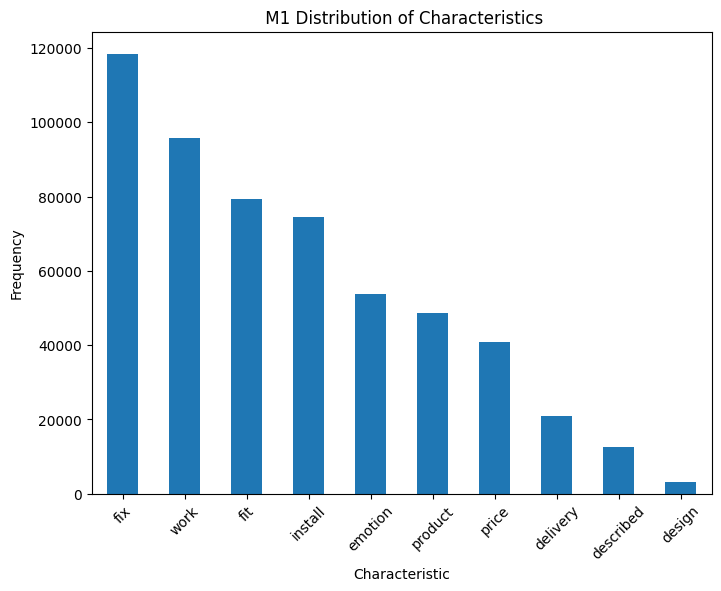

In [ ]:
import matplotlib.pyplot as plt
# Plot 1: Distribution of Characteristics
plt.figure(figsize=(8, 6))
df_all['Characteristic'].value_counts().plot(kind='bar')
plt.title(' M1 Distribution of Characteristics')
plt.xlabel('Characteristic')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

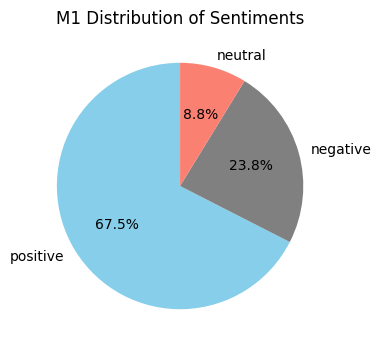

In [ ]:
# Load data
import pandas as pd
import matplotlib.pyplot as plt
df_all = pd.read_csv('df_all.csv')
# Create a pie chart for the sentiment polarity distribution with specific colors
colors = ['skyblue', 'gray','salmon']  # Colors corresponding to positive, neutral, and negative sentiments
plt.figure(figsize=(6, 4))
df_all['Sentiment Polarity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('M1 Distribution of Sentiments')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()

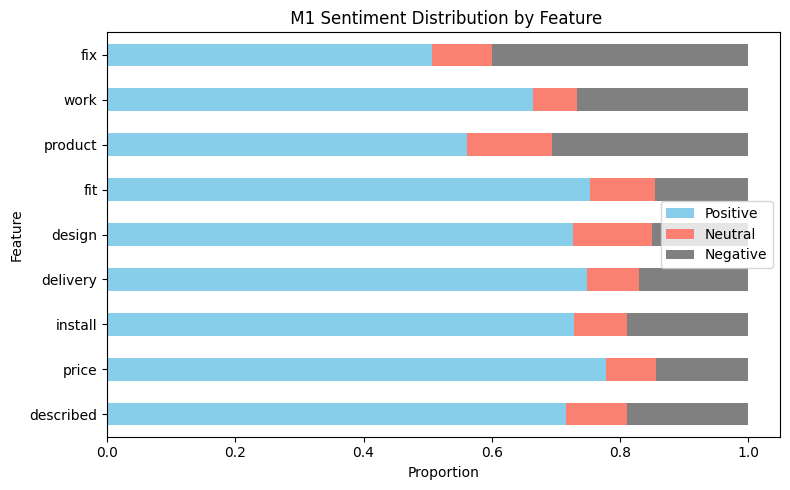

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data


# Clean data
df_all['Sentiment Polarity'] = df_all['Sentiment Polarity'].str.strip()
df_all['Stars'] = df_all['Stars'].str.strip()
df_all['Sentiment Score'] = df_all['Sentiment Score'].astype(float)
df_all['Characteristic Score'] = df_all['Characteristic Score'].astype(float)
df_all['Characteristic'] = df_all['Characteristic'].str.strip()

# Map sentiment to labels for visualization
df_all['label'] = df_all['Sentiment Polarity'].map({'positive': 0, 'neutral': 1, 'negative': 2})

# Feature list
features = [
    'described',
    'price',
    'install',
    'delivery',
    'design',
    'fit',
    'product',
    'work',
    'fix',
]

# Prepare figure layout
fig, ax = plt.subplots(figsize=(8, 5))

# Initialize an empty DataFrame to store sentiment data for each feature
sentiment_data = pd.DataFrame()

for feature in features:
    subset = df_all[df_all['Characteristic'] == feature]
    sentiment_distribution = subset['Sentiment Polarity'].value_counts(normalize=True)
    sentiment_distribution = sentiment_distribution.reindex(['positive', 'neutral', 'negative'], fill_value=0)
    sentiment_data = pd.concat([sentiment_data, sentiment_distribution.to_frame().T])

# Set the feature names as the index
sentiment_data.index = features

# Plotting
sentiment_data.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'salmon', 'gray'])
ax.set_xlabel('Proportion')
ax.set_ylabel('Feature')
ax.set_title(' M1 Sentiment Distribution by Feature')
plt.legend(['Positive', 'Neutral', 'Negative'])
plt.tight_layout()
plt.show()


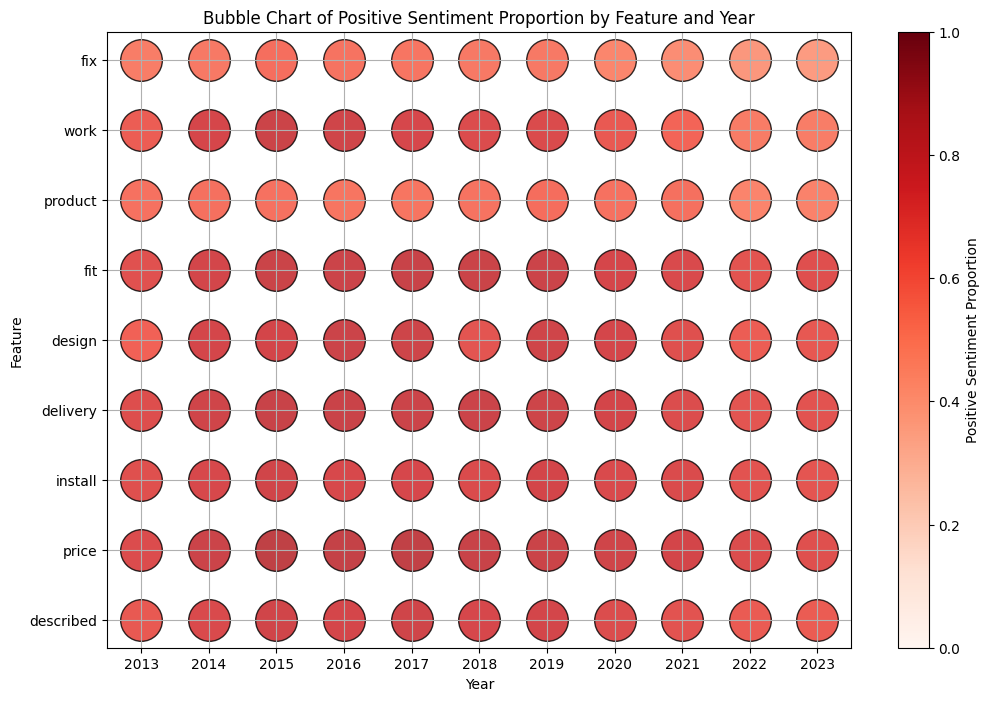

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Assuming the data is loaded into df_all


# Clean data
df_all['Sentiment Polarity'] = df_all['Sentiment Polarity'].str.strip()
df_all['Stars'] = df_all['Stars'].str.strip()
df_all['Sentiment Score'] = df_all['Sentiment Score'].astype(float)
df_all['Characteristic Score'] = df_all['Characteristic Score'].astype(float)
df_all['Characteristic'] = df_all['Characteristic'].str.strip()

# Ensure timestamp column is datetime type, and extract year
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])
df_all['year'] = df_all['timestamp'].dt.year

# Map sentiment to a binary label for calculating proportions (1 for positive, 0 otherwise)
df_all['label'] = df_all['Sentiment Polarity'].apply(lambda x: 1 if x == 'positive' else 0)

# Feature list
features = [
    'described',
    'price',
    'install',
    'delivery',
    'design',
    'fit',
    'product',
    'work',
    'fix',
]

# Calculate the proportion of positive sentiment per feature per year
bab_data = pd.DataFrame(index=features, columns=np.sort(df_all['year'].unique()))

# Fill bab_data DataFrame
for year in bab_data.columns:
    for feature in bab_data.index:
        if df_all[(df_all['year'] == year) & (df_all['Characteristic'] == feature)]['label'].count() > 0:
            bab_data.loc[feature, year] = df_all[(df_all['year'] == year) & (df_all['Characteristic'] == feature)]['label'].mean()
        else:
            bab_data.loc[feature, year] = 0

# Create a color map for visualization
cmap = plt.cm.Reds  # You can change the color map to any you prefer

# Normalize the color map based on the proportion values
norm = mcolors.Normalize(vmin=0, vmax=1)

# Create a bubble chart
fig, ax = plt.subplots(figsize=(12, 8))
for feature in bab_data.index:
    for year in bab_data.columns:
        proportion = bab_data.loc[feature, year]
        color = cmap(norm(proportion))
        ax.scatter(year, feature, color=color, s=900, alpha=0.8, edgecolors='black')  # Fixed size

ax.set_xlabel('Year')
ax.set_ylabel('Feature')
ax.set_title('Bubble Chart of Positive Sentiment Proportion by Feature and Year')
ax.grid(True)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', label='Positive Sentiment Proportion')
plt.xticks(bab_data.columns)
plt.show()

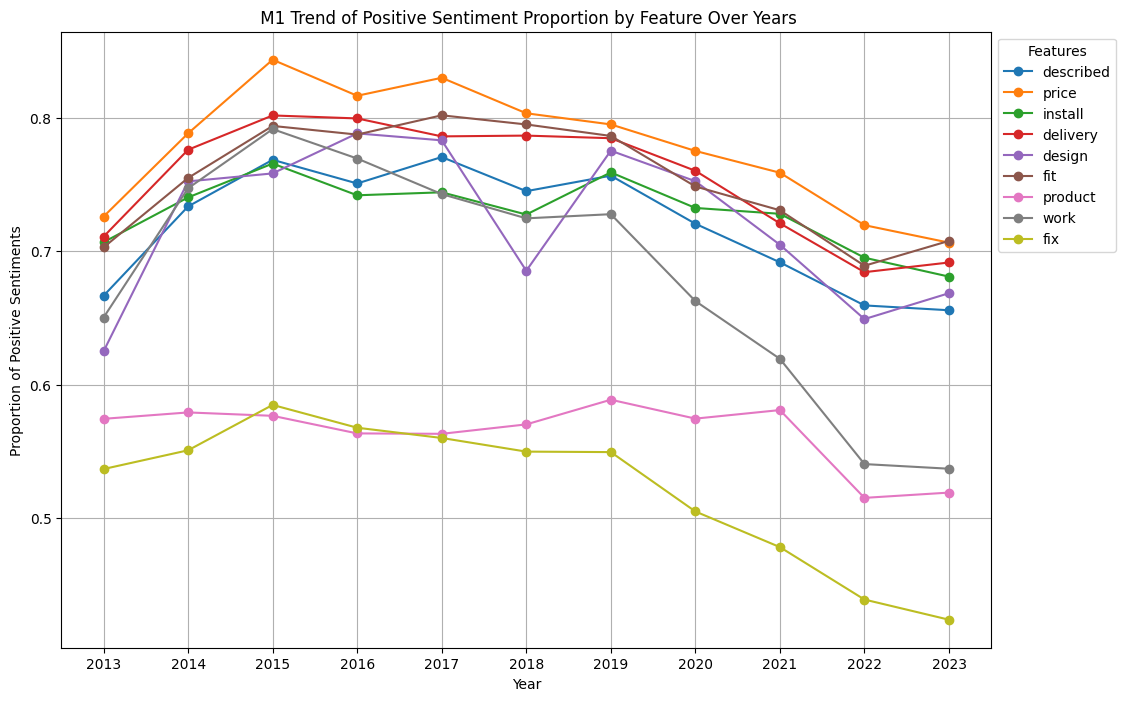

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

for feature in bab_data.index:
    ax.plot(bab_data.columns, bab_data.loc[feature], marker='o', label=feature)

ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Positive Sentiments')
ax.set_title(' M1 Trend of Positive Sentiment Proportion by Feature Over Years')
ax.grid(True)
# Place the legend outside the plot area on the right side
ax.legend(title='Features', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(bab_data.columns)  # Ensure x-axis has the correct year labels
plt.show()

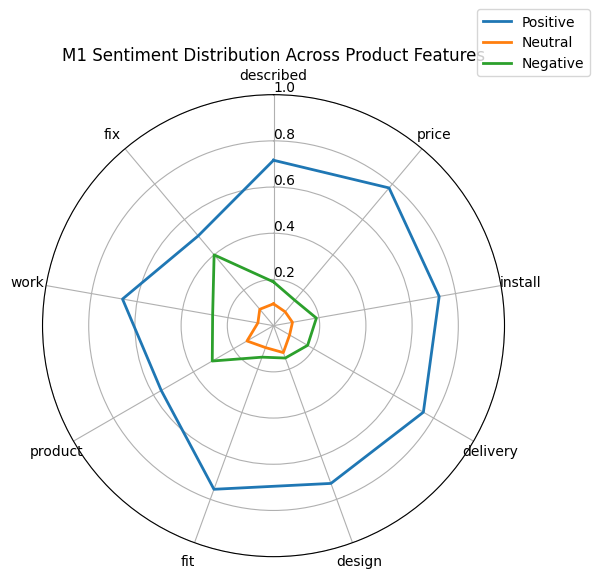

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi



# 清理数据
df_all['Sentiment Polarity'] = df_all['Sentiment Polarity'].str.strip()
df_all['Stars'] = df_all['Stars'].str.strip()
df_all['Sentiment Score'] = df_all['Sentiment Score'].astype(float)
df_all['Characteristic Score'] = df_all['Characteristic Score'].astype(float)
df_all['Characteristic'] = df_all['Characteristic'].str.strip()

# 特征列表
features = [
    'described',
    'price',
    'install',
    'delivery',
    'design',
    'fit',
    'product',
    'work',
    'fix',
]

# 计算每个特征的情感分布
angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
angles += angles[:1]  # 将起点闭合

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# 绘制三种情感的线
for sentiment in ['positive', 'neutral', 'negative']:
    values = []
    for feature in features:
        subset = df_all[df_all['Characteristic'] == feature]
        sentiment_count = subset['Sentiment Polarity'].value_counts(normalize=True).get(sentiment, 0)
        values.append(sentiment_count)
    values += values[:1]
    ax.plot(angles, values, label=sentiment.capitalize(), linewidth=2)

# 设置图表
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([a * 180 / pi for a in angles[:-1]], labels=features)
ax.set_rlabel_position(0)
ax.set_ylim(0, 1)
plt.title('M1 Sentiment Distribution Across Product Features')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls